# Natural Language Processing

## Sentiment Analysis

**----: Problem Statement :----**
- **About Practice Problem: Identify the Sentiments**
   - Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

  - Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

#### ----: Importing necessary liabraries :----

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import re 
pd.set_option("display.max_colwidth",200)
import nltk
import string
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
plt.style.use('seaborn')

**----: Importing Word Net Lemmatizer and stopwords :----**

In [20]:
wn = nltk.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words("english")

#### ----: Reading Datasets :----

In [29]:
# training dataset
train_dataset=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Sentiment analysis/train_sentiment.csv") 
#training labels
label=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Sentiment analysis/train_sentiment.csv") 
# testing dataset
test_dataset=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Sentiment analysis/test_sentiment.csv")
# Submission format
submission=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Sentiment analysis/submission1.csv")

**----: Exploring Datasets :----**

In [30]:
# printing the size of the dataset
print("train_dataset--->",train_dataset.shape)
print("test_dataset--->",test_dataset.shape)

train_dataset---> (7920, 3)
test_dataset---> (1953, 2)


In [31]:
train_dataset=train_dataset.drop("label",axis=1)
## convertinig each text into lower case
train_dataset["tweet"]=train_dataset["tweet"].str.lower()



In [32]:
# copying the train_dataset to train.
train=train_dataset

In [33]:
train.head()

,id,tweet
0,1,#fingerprint #pregnancy test https://goo.gl/h1mfqv #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,finally a transparant silicon case ^^ thanks to my uncle :) #yay #sony #xperia #s #sonyexperias… http://instagram.com/p/yget5jc6jm/
2,3,we love this! would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6n3lsupcu
3,4,i'm wired i know i'm george i was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/li_5_ujs4k/
4,5,what amazing service! apple won't even talk to me about a question i have unless i pay them $19.95 for their stupid support!


In [34]:
# copying the test_dataset to test.
test=test_dataset

In [35]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [36]:
# conctinating the test and train dataset in order to avoid the repetation of cleaning process on this datasets.
# we will again split the datasets into train and test after the preprocessing of the datasets.
final_dataset=pd.concat([train,test],axis=0)

In [37]:
final_dataset.head()

,id,tweet
0,1,#fingerprint #pregnancy test https://goo.gl/h1mfqv #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,finally a transparant silicon case ^^ thanks to my uncle :) #yay #sony #xperia #s #sonyexperias… http://instagram.com/p/yget5jc6jm/
2,3,we love this! would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6n3lsupcu
3,4,i'm wired i know i'm george i was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/li_5_ujs4k/
4,5,what amazing service! apple won't even talk to me about a question i have unless i pay them $19.95 for their stupid support!


In [38]:
## adding a new feature teweet length to the dataset
## it shows the length of the tweets
final_dataset["tweet_length"]=final_dataset["tweet"].apply(lambda x:len(x)-x.count(" "))

In [39]:
# adding new column : punct%
# punct% shows the percentage of punctuations used in the tweets

# function for calculating punctuation percentage in each tweet
def punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
final_dataset['punct%']=final_dataset["tweet"].apply(lambda x: punct(x))
final_dataset.head()

,id,tweet,tweet_length,punct%
0,1,#fingerprint #pregnancy test https://goo.gl/h1mfqv #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,116,13.8
1,2,finally a transparant silicon case ^^ thanks to my uncle :) #yay #sony #xperia #s #sonyexperias… http://instagram.com/p/yget5jc6jm/,115,13.9
2,3,we love this! would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6n3lsupcu,109,16.5
3,4,i'm wired i know i'm george i was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/li_5_ujs4k/,96,17.7
4,5,what amazing service! apple won't even talk to me about a question i have unless i pay them $19.95 for their stupid support!,102,4.9


In [40]:
## remove the non-alphabets
final_dataset["tweet"]=final_dataset["tweet"].str.replace("[^a-z ]","")

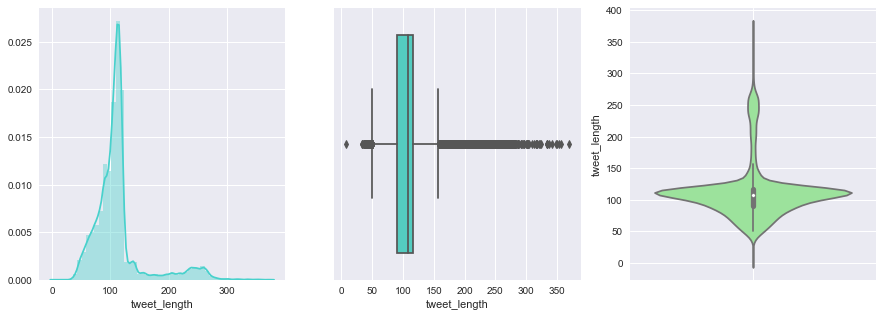

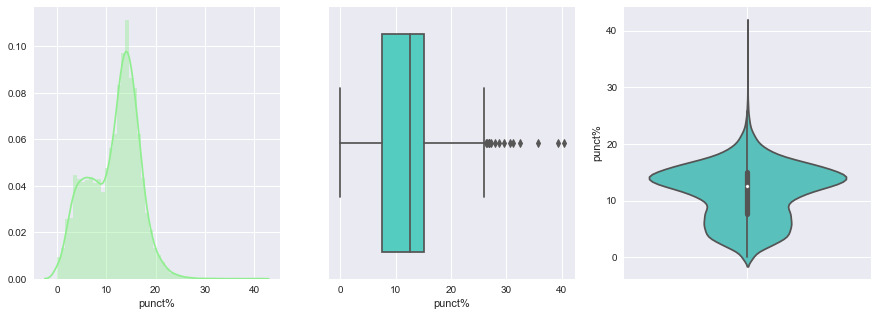

In [41]:
# visualising the distribution of tweet length in the datasets
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.distplot(final_dataset["tweet_length"],ax=ax[0],color="mediumturquoise")
sns.boxplot(final_dataset["tweet_length"],hue=label["label"],ax=ax[1],color="turquoise")
sns.violinplot(final_dataset["tweet_length"],hue=label["label"],ax=ax[2],orient="v",color="lightgreen")
plt.grid(True)
# visualising the distribution of punct% in the datasets
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.distplot(final_dataset["punct%"],ax=ax[0],color="lightgreen")
sns.boxplot(final_dataset["punct%"],ax=ax[1],color="turquoise")
sns.violinplot(final_dataset["punct%"],ax=ax[2],orient="v",color="mediumturquoise")
plt.grid(True)


In [42]:
# function for converting raw tweets into tokenized tweets with no stopwords.

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text
# adding new column tweet_nostopwords which consists of tokenized tweets with no stopwords.
final_dataset['tweet_nostopwords'] = final_dataset['tweet'].apply(lambda x: clean_text(x.lower()))
final_dataset.head()

,id,tweet,tweet_length,punct%,tweet_nostopwords
0,1,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone,116,13.8,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, iphoneonly, iphonesia, iphone]"
1,2,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias httpinstagramcompygetjcjm,115,13.9,"[finally, transparant, silicon, case, thanks, uncle, yay, sony, xperia, sonyexperias, httpinstagramcompygetjcjm]"
2,3,we love this would you go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,109,16.5,"[love, would, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect, httpfbmenlsupcu]"
3,4,im wired i know im george i was made that way iphone cute daventry home httpinstagrampliujsk,96,17.7,"[im, wired, know, im, george, made, way, iphone, cute, daventry, home, httpinstagrampliujsk]"
4,5,what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support,102,4.9,"[amazing, service, apple, wont, even, talk, question, unless, pay, stupid, support]"


In [43]:
# function for converting tokenized tweets into lemmatized tweets.
def lemmatizing(tokenized_text):
    text =" ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

# adding new column tweet_lemmatized which consists of lemmatized tweets.
final_dataset['tweet_lemmatized'] = final_dataset['tweet_nostopwords'].apply(lambda x: lemmatizing(x))

final_dataset.head()

,id,tweet,tweet_length,punct%,tweet_nostopwords,tweet_lemmatized
0,1,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone,116,13.8,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, iphoneonly, iphonesia, iphone]",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias httpinstagramcompygetjcjm,115,13.9,"[finally, transparant, silicon, case, thanks, uncle, yay, sony, xperia, sonyexperias, httpinstagramcompygetjcjm]",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompygetjcjm
2,3,we love this would you go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,109,16.5,"[love, would, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect, httpfbmenlsupcu]",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,im wired i know im george i was made that way iphone cute daventry home httpinstagrampliujsk,96,17.7,"[im, wired, know, im, george, made, way, iphone, cute, daventry, home, httpinstagrampliujsk]",im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support,102,4.9,"[amazing, service, apple, wont, even, talk, question, unless, pay, stupid, support]",amazing service apple wont even talk question unless pay stupid support


### ***Random Forest Model Using Count Vectorizer***

In [44]:
# imporitng count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# converting the finsl dataset into vector matrix
count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(final_dataset["tweet_lemmatized"])
print(X_counts.shape)

(9873, 25093)


In [46]:
X_counts # we cannot print the matrix because it is a sparse matrix

<9873x25093 sparse matrix of type '<class 'numpy.int64'>'
	with 113194 stored elements in Compressed Sparse Row format>

In [47]:
# in order to print the matrix we have to convert it to array
X_counts_df=pd.DataFrame(X_counts.toarray())
#X_counts_df.columns=count_vect.get_feature_names()
X_counts_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25083,25084,25085,25086,25087,25088,25089,25090,25091,25092
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# adding the tweet length and punct% column to the  vectorized dataset
a=pd.DataFrame(np.array(final_dataset['tweet_length']).reshape(-1,1),columns=["tweet_length"])
b=pd.DataFrame(np.array(final_dataset['punct%']).reshape(-1,1),columns=["punct%"])
final_dataset1= pd.concat([a,b,X_counts_df],axis=1)

In [49]:
# final dataset for fitting ML model
final_dataset1.head()

,tweet_length,punct%,0,1,2,3,4,5,6,7,...,25083,25084,25085,25086,25087,25088,25089,25090,25091,25092
0,116,13.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,115,13.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109,16.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,17.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,4.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# splitting the dataset into train and test as we specified above.
final_train=final_dataset1.iloc[0:7920,:]
final_test=final_dataset1.iloc[7920:,:]

In [51]:
# creating object of the model
rf = RandomForestClassifier(n_jobs=-1,n_estimators=300)
#k_fold = KFold(n_splits=5)
#cross_val_score(rf, final_train, label['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

In [52]:
# fitting the model
rf.fit(final_train,label['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
# predicting on test dataset
y_pred=rf.predict(final_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


### ***Random Forest Model Using TF-IDF Vectorizer***

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf.fit_transform(final_dataset["tweet_lemmatized"])
print(x_tfidf.shape)

(9873, 25093)


In [56]:
# in order to print the matrix we have to convert it to array
x_tfidf_df=pd.DataFrame(x_tfidf.toarray())
#x_tfidf_df.columns=tfidf.get_feature_names()
x_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25083,25084,25085,25086,25087,25088,25089,25090,25091,25092
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
a=pd.DataFrame(np.array(final_dataset['tweet_length']).reshape(-1,1))
b=pd.DataFrame(np.array(final_dataset['punct%']).reshape(-1,1))

In [58]:
final_dataset1= pd.concat([a,b,x_tfidf_df],axis=1)

In [59]:
final_train=final_dataset1.iloc[0:7920,:]
final_test=final_dataset1.iloc[7920:,:]

In [60]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=300)
#k_fold = KFold(n_splits=5)
#cross_val_score(rf, final_train, train_dataset['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

In [61]:
rf.fit(final_train,label['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
y_pred=rf.predict(final_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,1
1,0
2,1
3,1
4,0


# -----------------------------------The End---------------------------------------